# Building Data Genome Project 2.0
## Models evaluation

Biam! (pic.biam@gmail.com)

In [46]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_log_error

In [7]:
path_pred = "..\\data\\predictions\\"

## Functions

In [30]:
def calcRMSLE(y_real, y_pred):
    rmsle = np.sqrt(mean_squared_log_error( y_real, y_pred ))
    return rmsle

In [6]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## Short-term prediction

### Winter season

In [18]:
st_winter = pd.read_csv(path_pred + "shortterm-winter_pred.csv", parse_dates=True, index_col='timestamp')
st_winter.dropna(inplace=True)
st_winter.reset_index(inplace=True)

In [19]:
st_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189286 entries, 0 to 189285
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   timestamp      189286 non-null  datetime64[ns]
 1   building_id    189286 non-null  object        
 2   meter          189286 non-null  object        
 3   meter_reading  189286 non-null  float64       
 4   LGBM           189286 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.2+ MB


In [20]:
st_winter.head()

,timestamp,building_id,meter,meter_reading,LGBM
0,2017-02-01 00:00:00,Jarrod_Panther_Lodging/residential,chilledwater,464.3139,1259.357777
1,2017-02-01 01:00:00,Jarrod_Panther_Lodging/residential,chilledwater,422.1036,1055.710598
2,2017-02-01 02:00:00,Jarrod_Panther_Lodging/residential,chilledwater,379.8932,899.462317
3,2017-02-01 03:00:00,Jarrod_Panther_Lodging/residential,chilledwater,295.4725,851.878107
4,2017-02-01 04:00:00,Jarrod_Panther_Lodging/residential,chilledwater,295.4725,769.181125


#### Plots

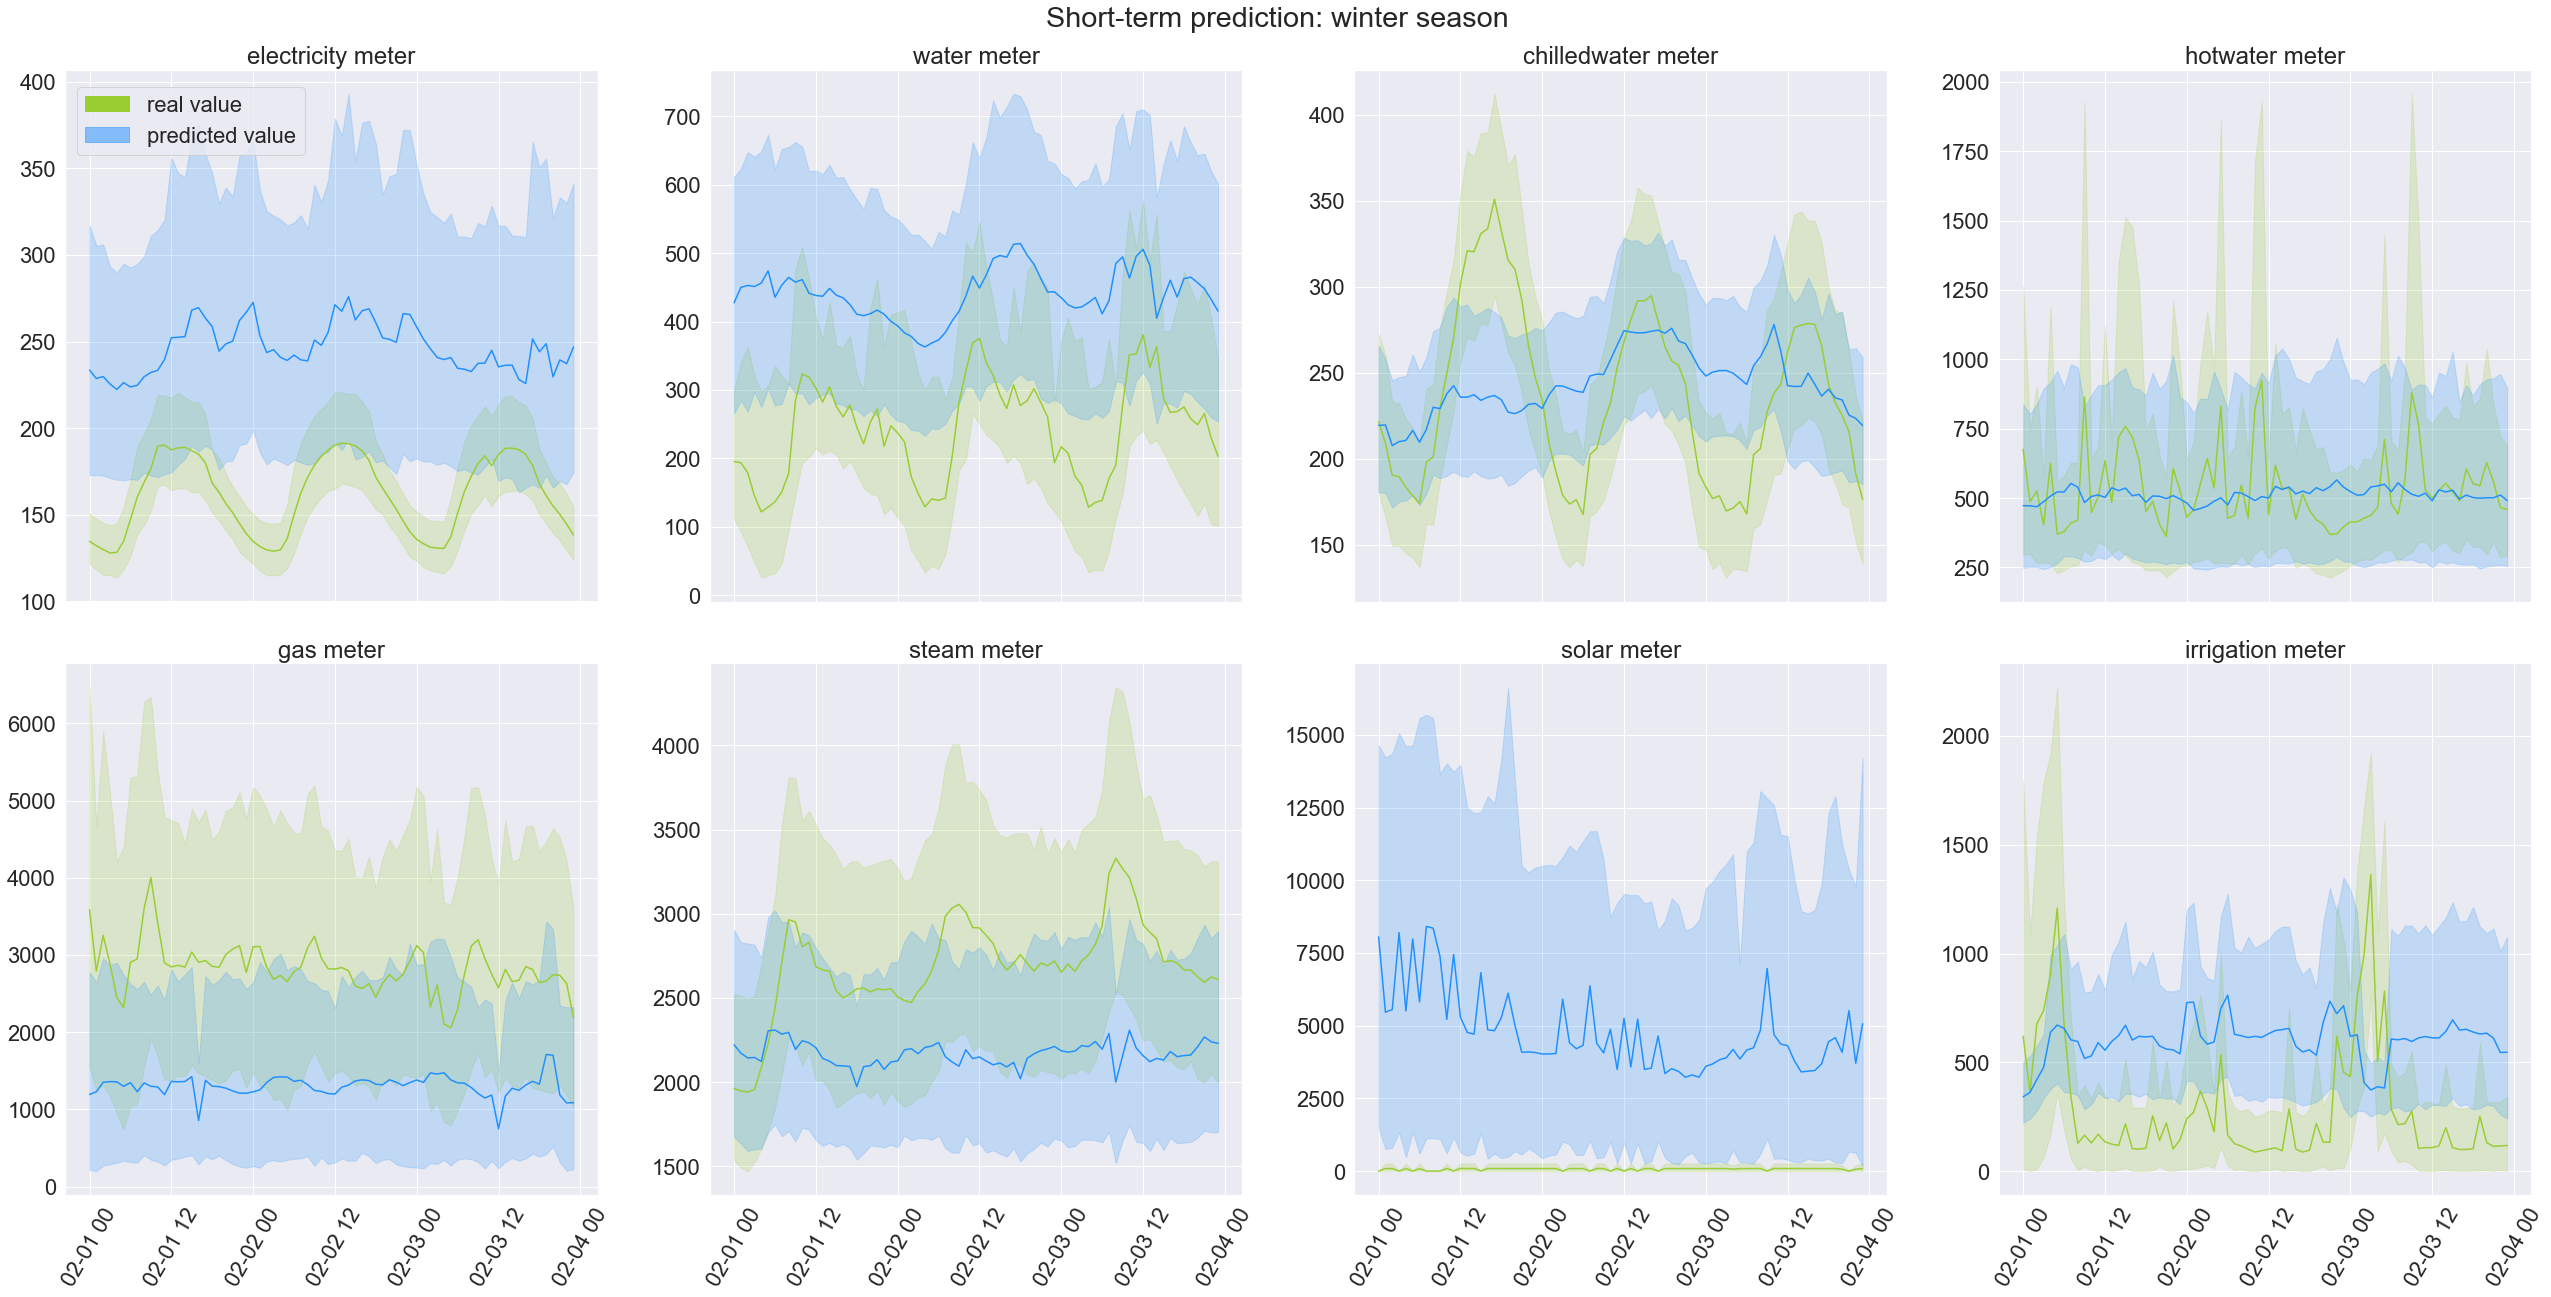

In [111]:
sns.set(rc={'figure.figsize':(36,18)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 4, sharex=True)
axes = axes.flatten()

color_real = "yellowgreen"
color_pred = "dodgerblue"

metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

for i,j in enumerate(metername):
    temp = st_winter[st_winter.meter==j]
    ax = axes[i]
    sns.lineplot(data=temp, x="timestamp", y="meter_reading", ax=ax, color=color_real)
    sns.lineplot(data=temp, x="timestamp", y="LGBM", ax=ax, color = color_pred)
    ax.title.set_text(j + " meter")
    ax.set(xlabel="", ylabel="")
    
    if i in [4,5,6,7]:        
        ax.xaxis_date()
        ax.tick_params("x", labelrotation=60)
    
    else:      
        continue
        
# Customizes legend and title
green_patch = mpatches.Patch(color=color_real, label='real value')
blue_patch = mpatches.Patch(color=color_pred, label='predicted value', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1, loc= [0.03, 0.88])
f.suptitle("Short-term prediction: winter season", x = 0.5, y = 1.01)
f.tight_layout()

In [112]:
f.savefig("..\\figures\\pred_shortterm-winter1.pdf", bbox_inches='tight')
f.savefig("..\\figures\\pred_shortterm-winter1.png", dpi=72, bbox_inches='tight')

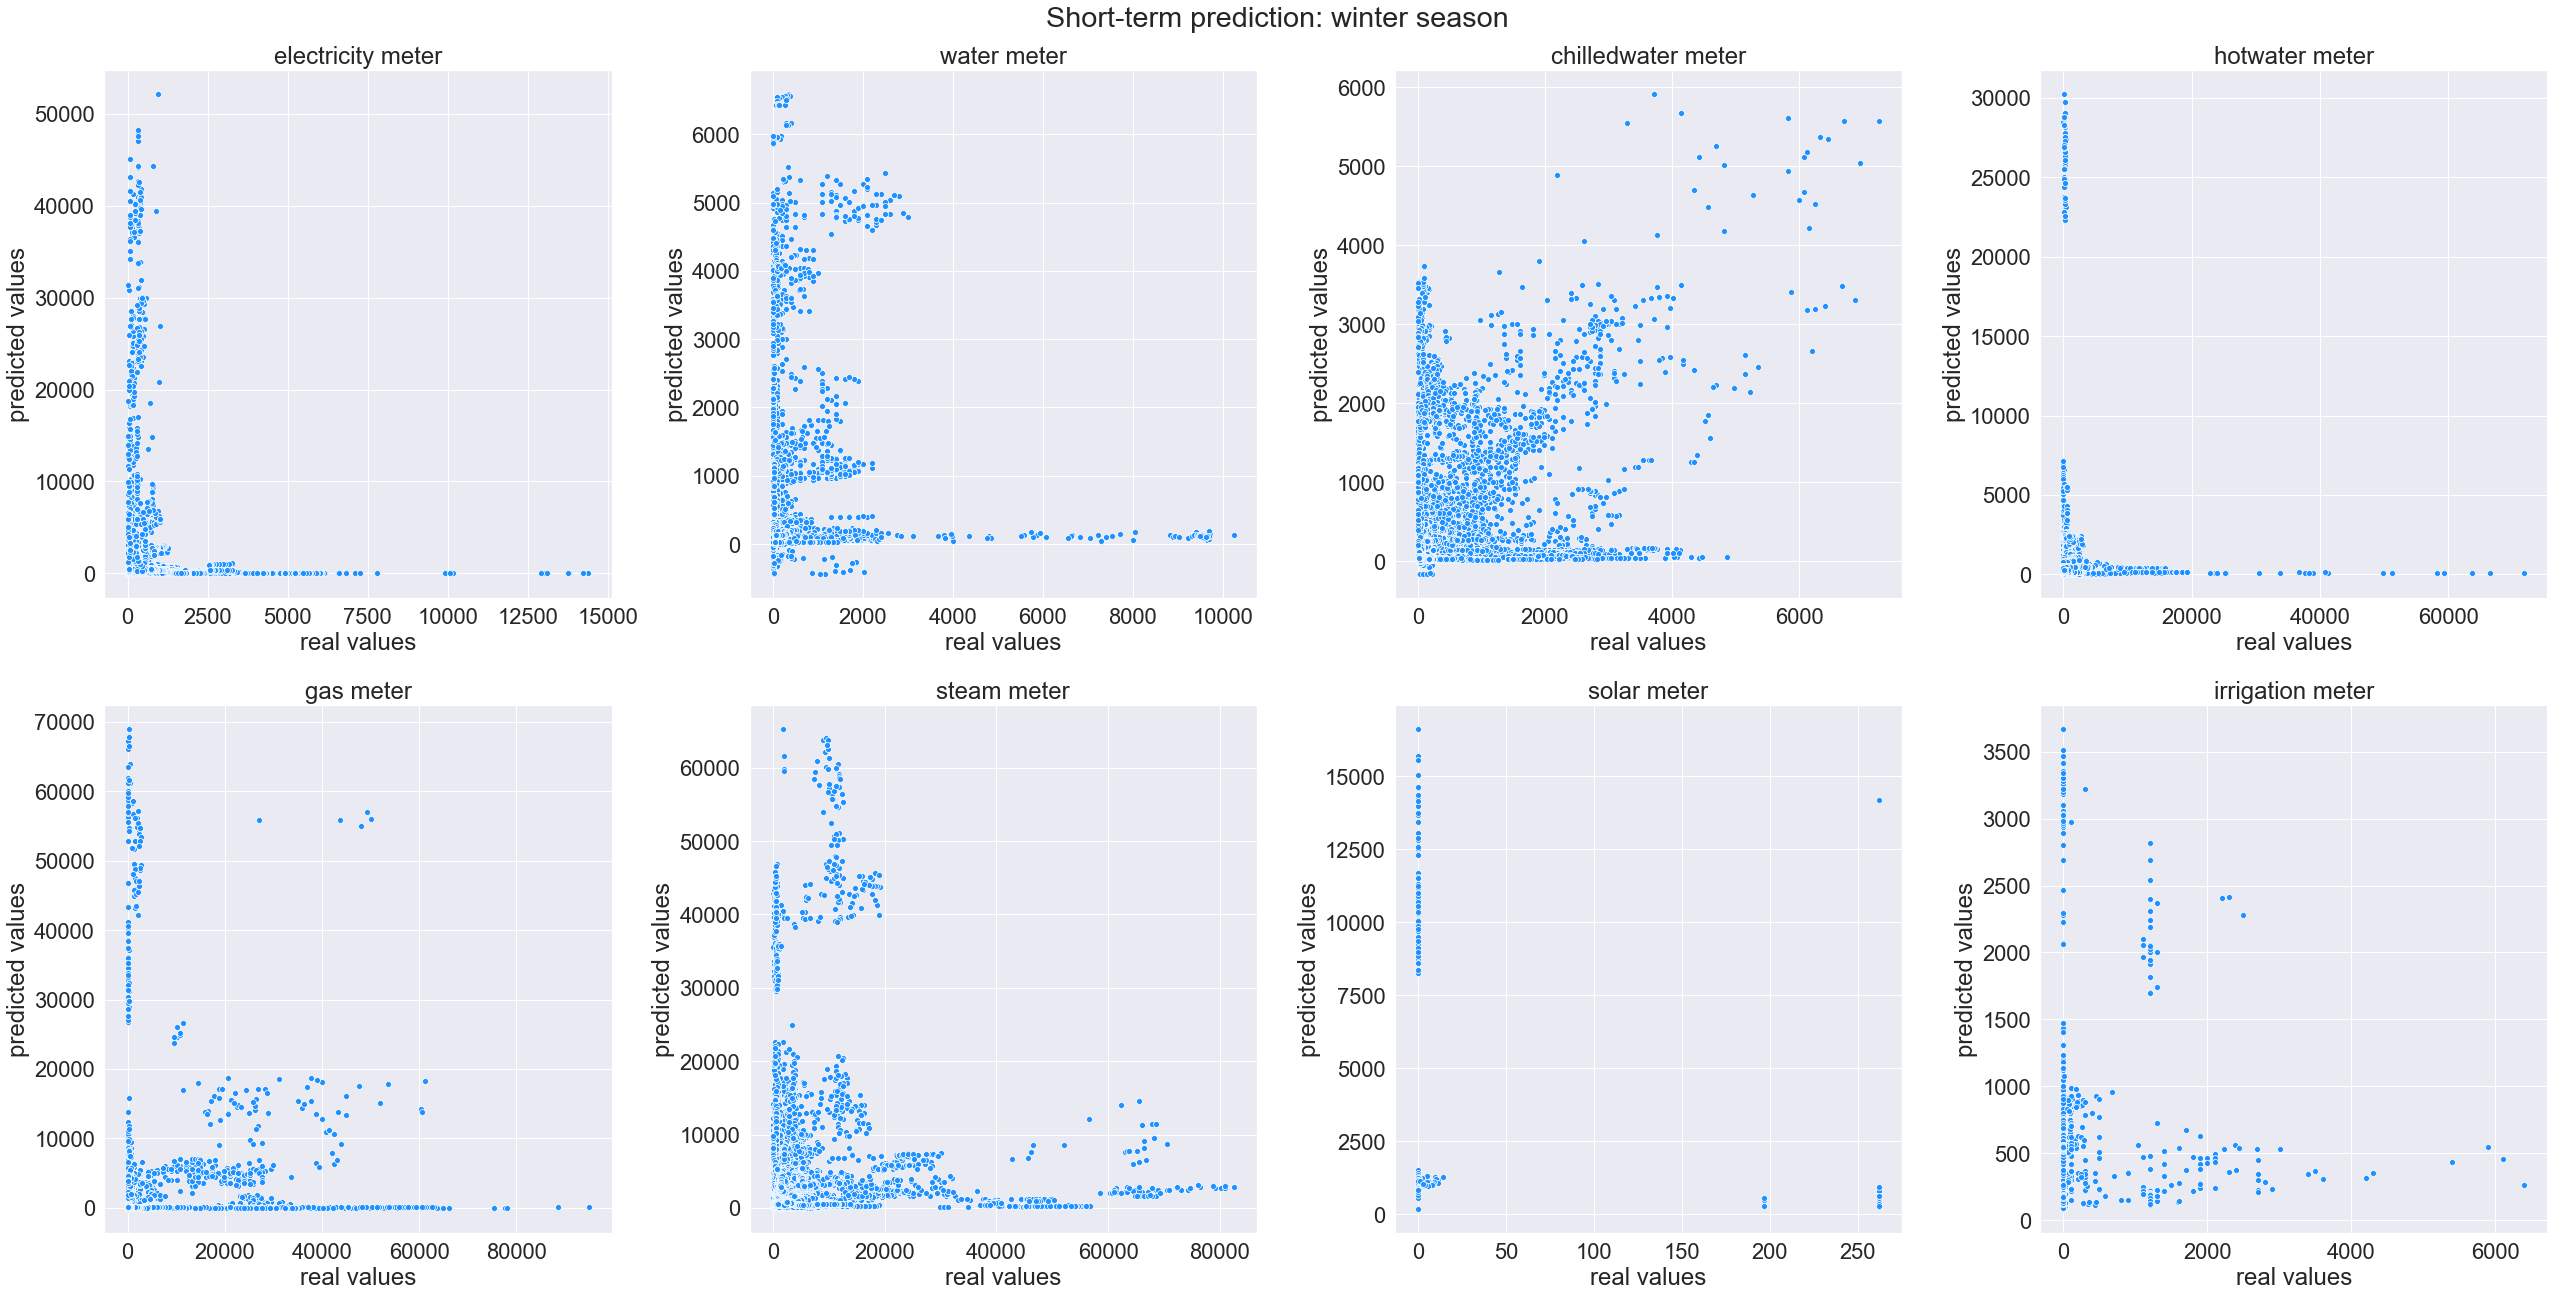

In [106]:
sns.set(rc={'figure.figsize':(36,18)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 4)
axes = axes.flatten()

color_real = "yellowgreen"
color_pred = "dodgerblue"

metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

for i,j in enumerate(metername):
    temp = st_winter[st_winter.meter==j]
    ax = axes[i]
    sns.scatterplot(data=temp, x="meter_reading", y="LGBM", ax=ax, color=color_pred)
    ax.title.set_text(j + " meter")
    ax.set(xlabel="real values", ylabel="predicted values")

f.suptitle("Short-term prediction: winter season", x = 0.5, y = 1.01)
f.tight_layout()

In [107]:
f.savefig("..\\figures\\pred_shortterm-winter2.pdf", bbox_inches='tight')
f.savefig("..\\figures\\pred_shortterm-winter2.png", dpi=72, bbox_inches='tight')

### Summer season

In [113]:
st_summer = pd.read_csv(path_pred + "shortterm-summer_pred.csv", parse_dates=True, index_col='timestamp')
st_summer.dropna(inplace=True)
st_summer.reset_index(inplace=True)

In [114]:
st_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188835 entries, 0 to 188834
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   timestamp      188835 non-null  datetime64[ns]
 1   building_id    188835 non-null  object        
 2   meter          188835 non-null  object        
 3   meter_reading  188835 non-null  float64       
 4   LGBM           188835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.2+ MB


In [115]:
st_summer.head()

,timestamp,building_id,meter,meter_reading,LGBM
0,2017-08-01 00:00:00,Gwyneth_Panther_Office,chilledwater,844.2072,645.324614
1,2017-08-01 01:00:00,Gwyneth_Panther_Office,chilledwater,844.2072,620.794402
2,2017-08-01 02:00:00,Gwyneth_Panther_Office,chilledwater,801.9968,620.794402
3,2017-08-01 03:00:00,Gwyneth_Panther_Office,chilledwater,844.2072,659.043280
4,2017-08-01 04:00:00,Gwyneth_Panther_Office,chilledwater,844.2072,644.541422


#### Plots

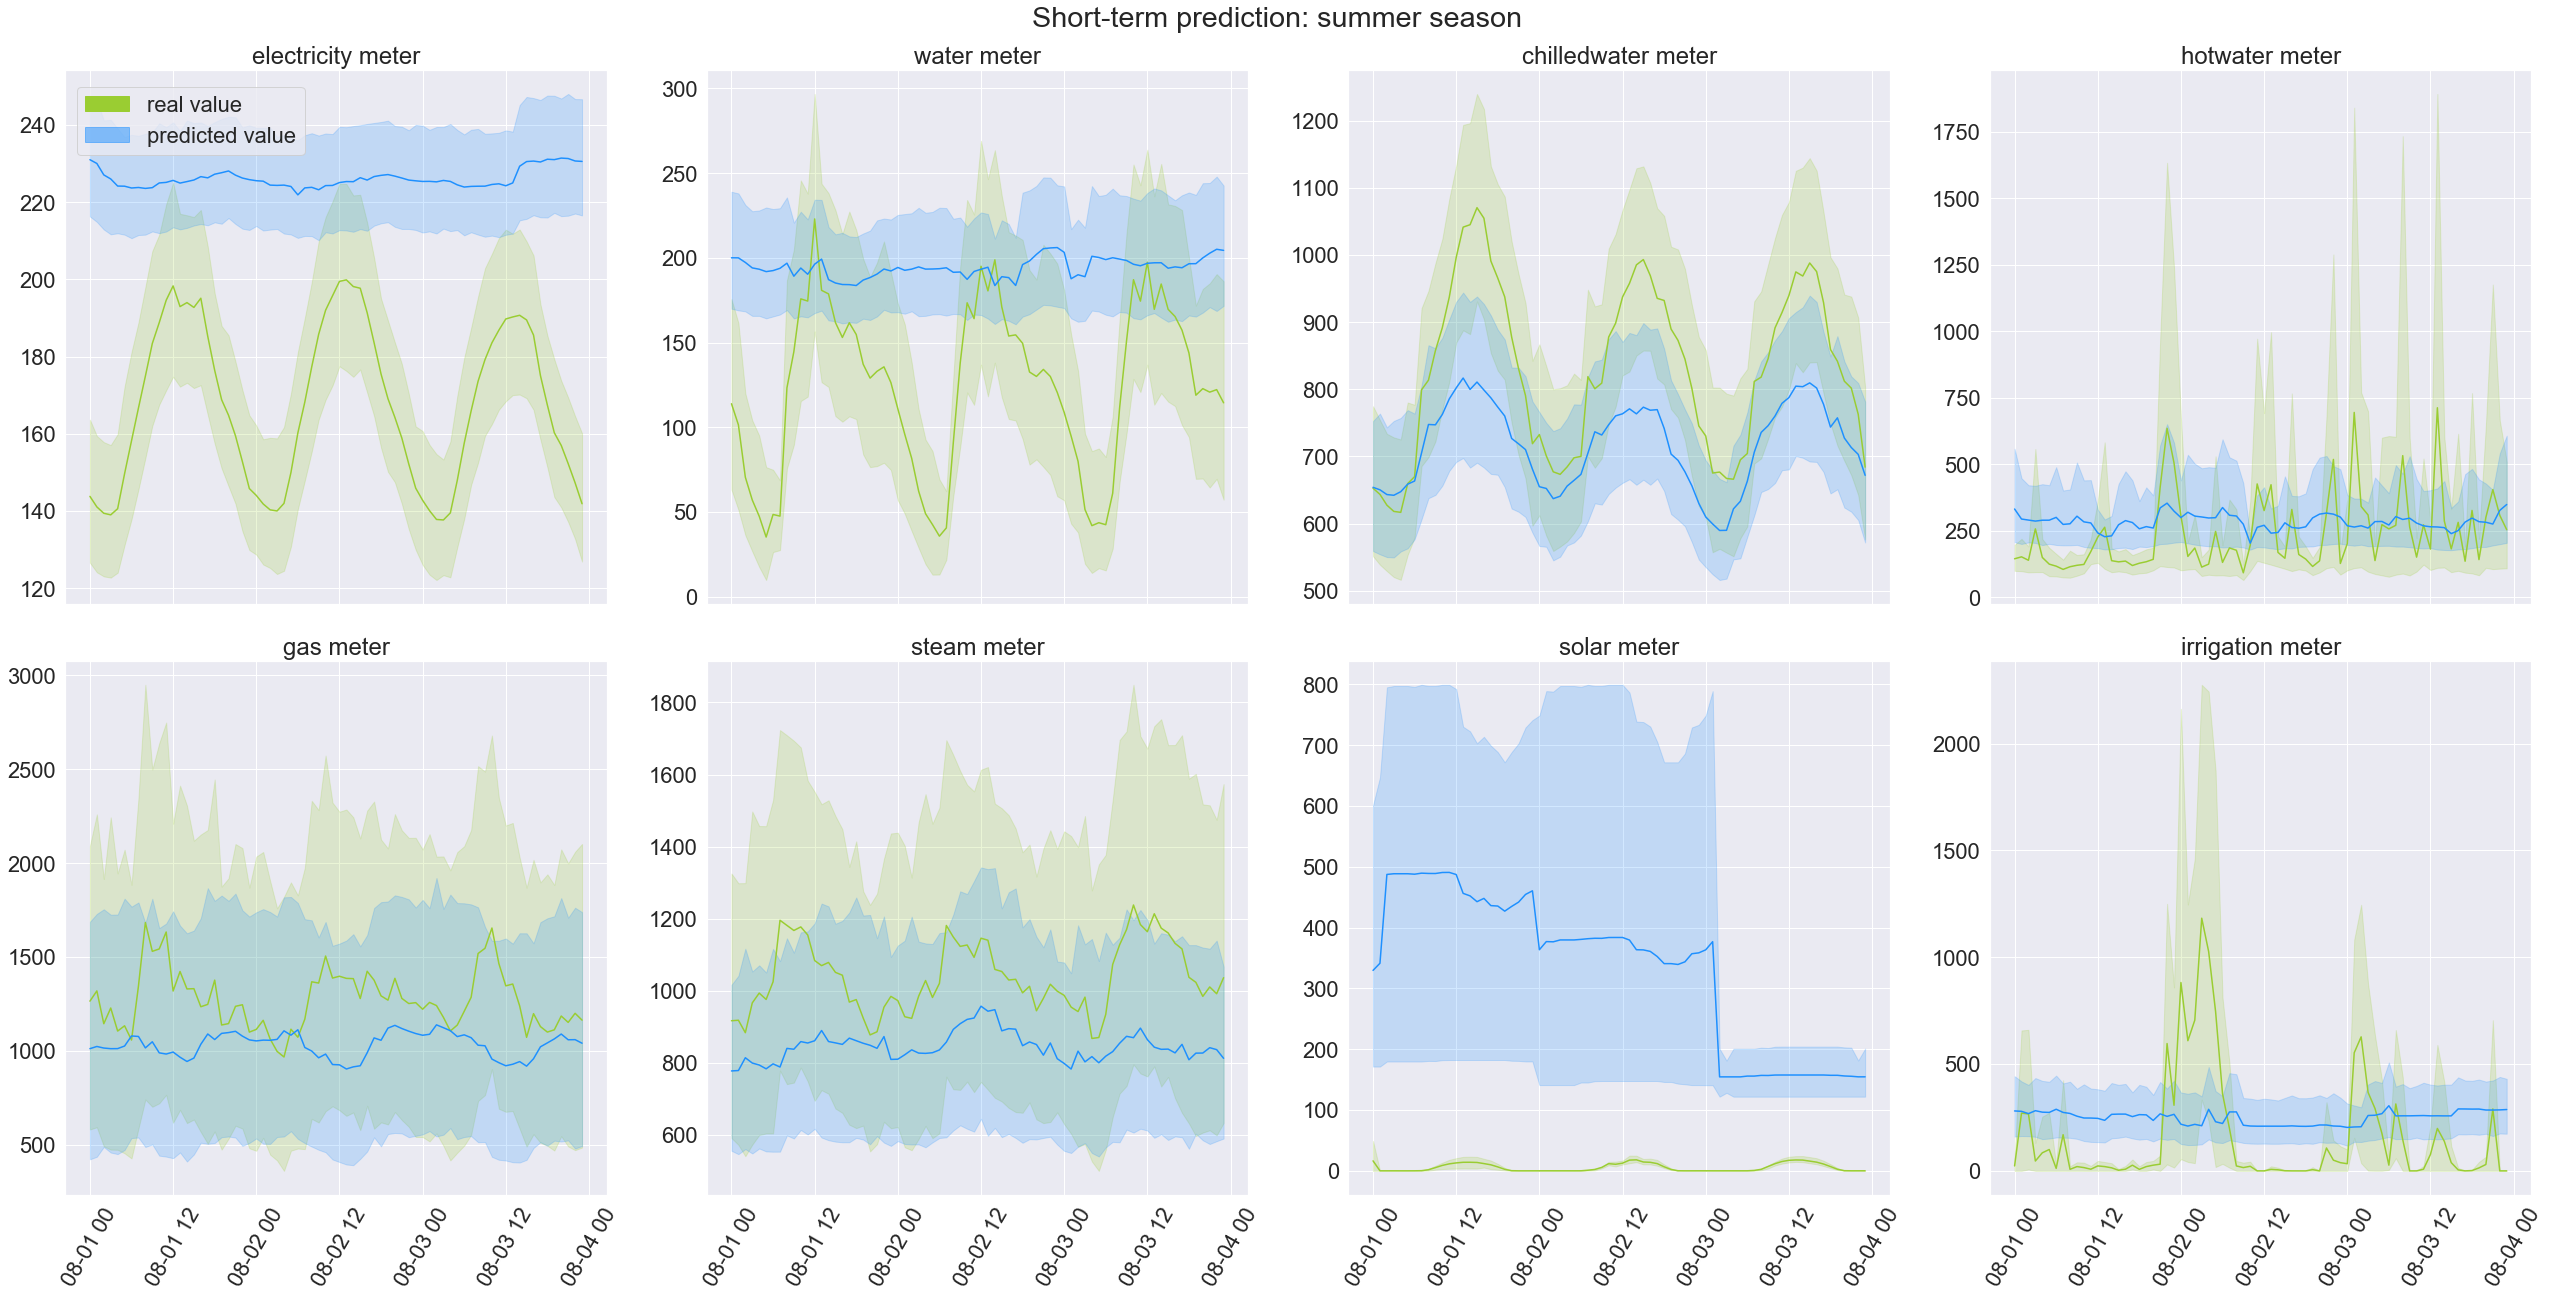

In [118]:
sns.set(rc={'figure.figsize':(36,18)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 4, sharex=True)
axes = axes.flatten()

color_real = "yellowgreen"
color_pred = "dodgerblue"

metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

for i,j in enumerate(metername):
    temp = st_summer[st_summer.meter==j]
    ax = axes[i]
    sns.lineplot(data=temp, x="timestamp", y="meter_reading", ax=ax, color=color_real)
    sns.lineplot(data=temp, x="timestamp", y="LGBM", ax=ax, color = color_pred)
    ax.title.set_text(j + " meter")
    ax.set(xlabel="", ylabel="")
    
    if i in [4,5,6,7]:        
        ax.xaxis_date()
        ax.tick_params("x", labelrotation=60)
    
    else:      
        continue
        
# Customizes legend and title
green_patch = mpatches.Patch(color=color_real, label='real value')
blue_patch = mpatches.Patch(color=color_pred, label='predicted value', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1, loc= [0.03, 0.88])
f.suptitle("Short-term prediction: summer season", x = 0.5, y = 1.01)
f.tight_layout()

In [119]:
f.savefig("..\\figures\\pred_shortterm-summer1.pdf", bbox_inches='tight')
f.savefig("..\\figures\\pred_shortterm-summer1.png", dpi=72, bbox_inches='tight')

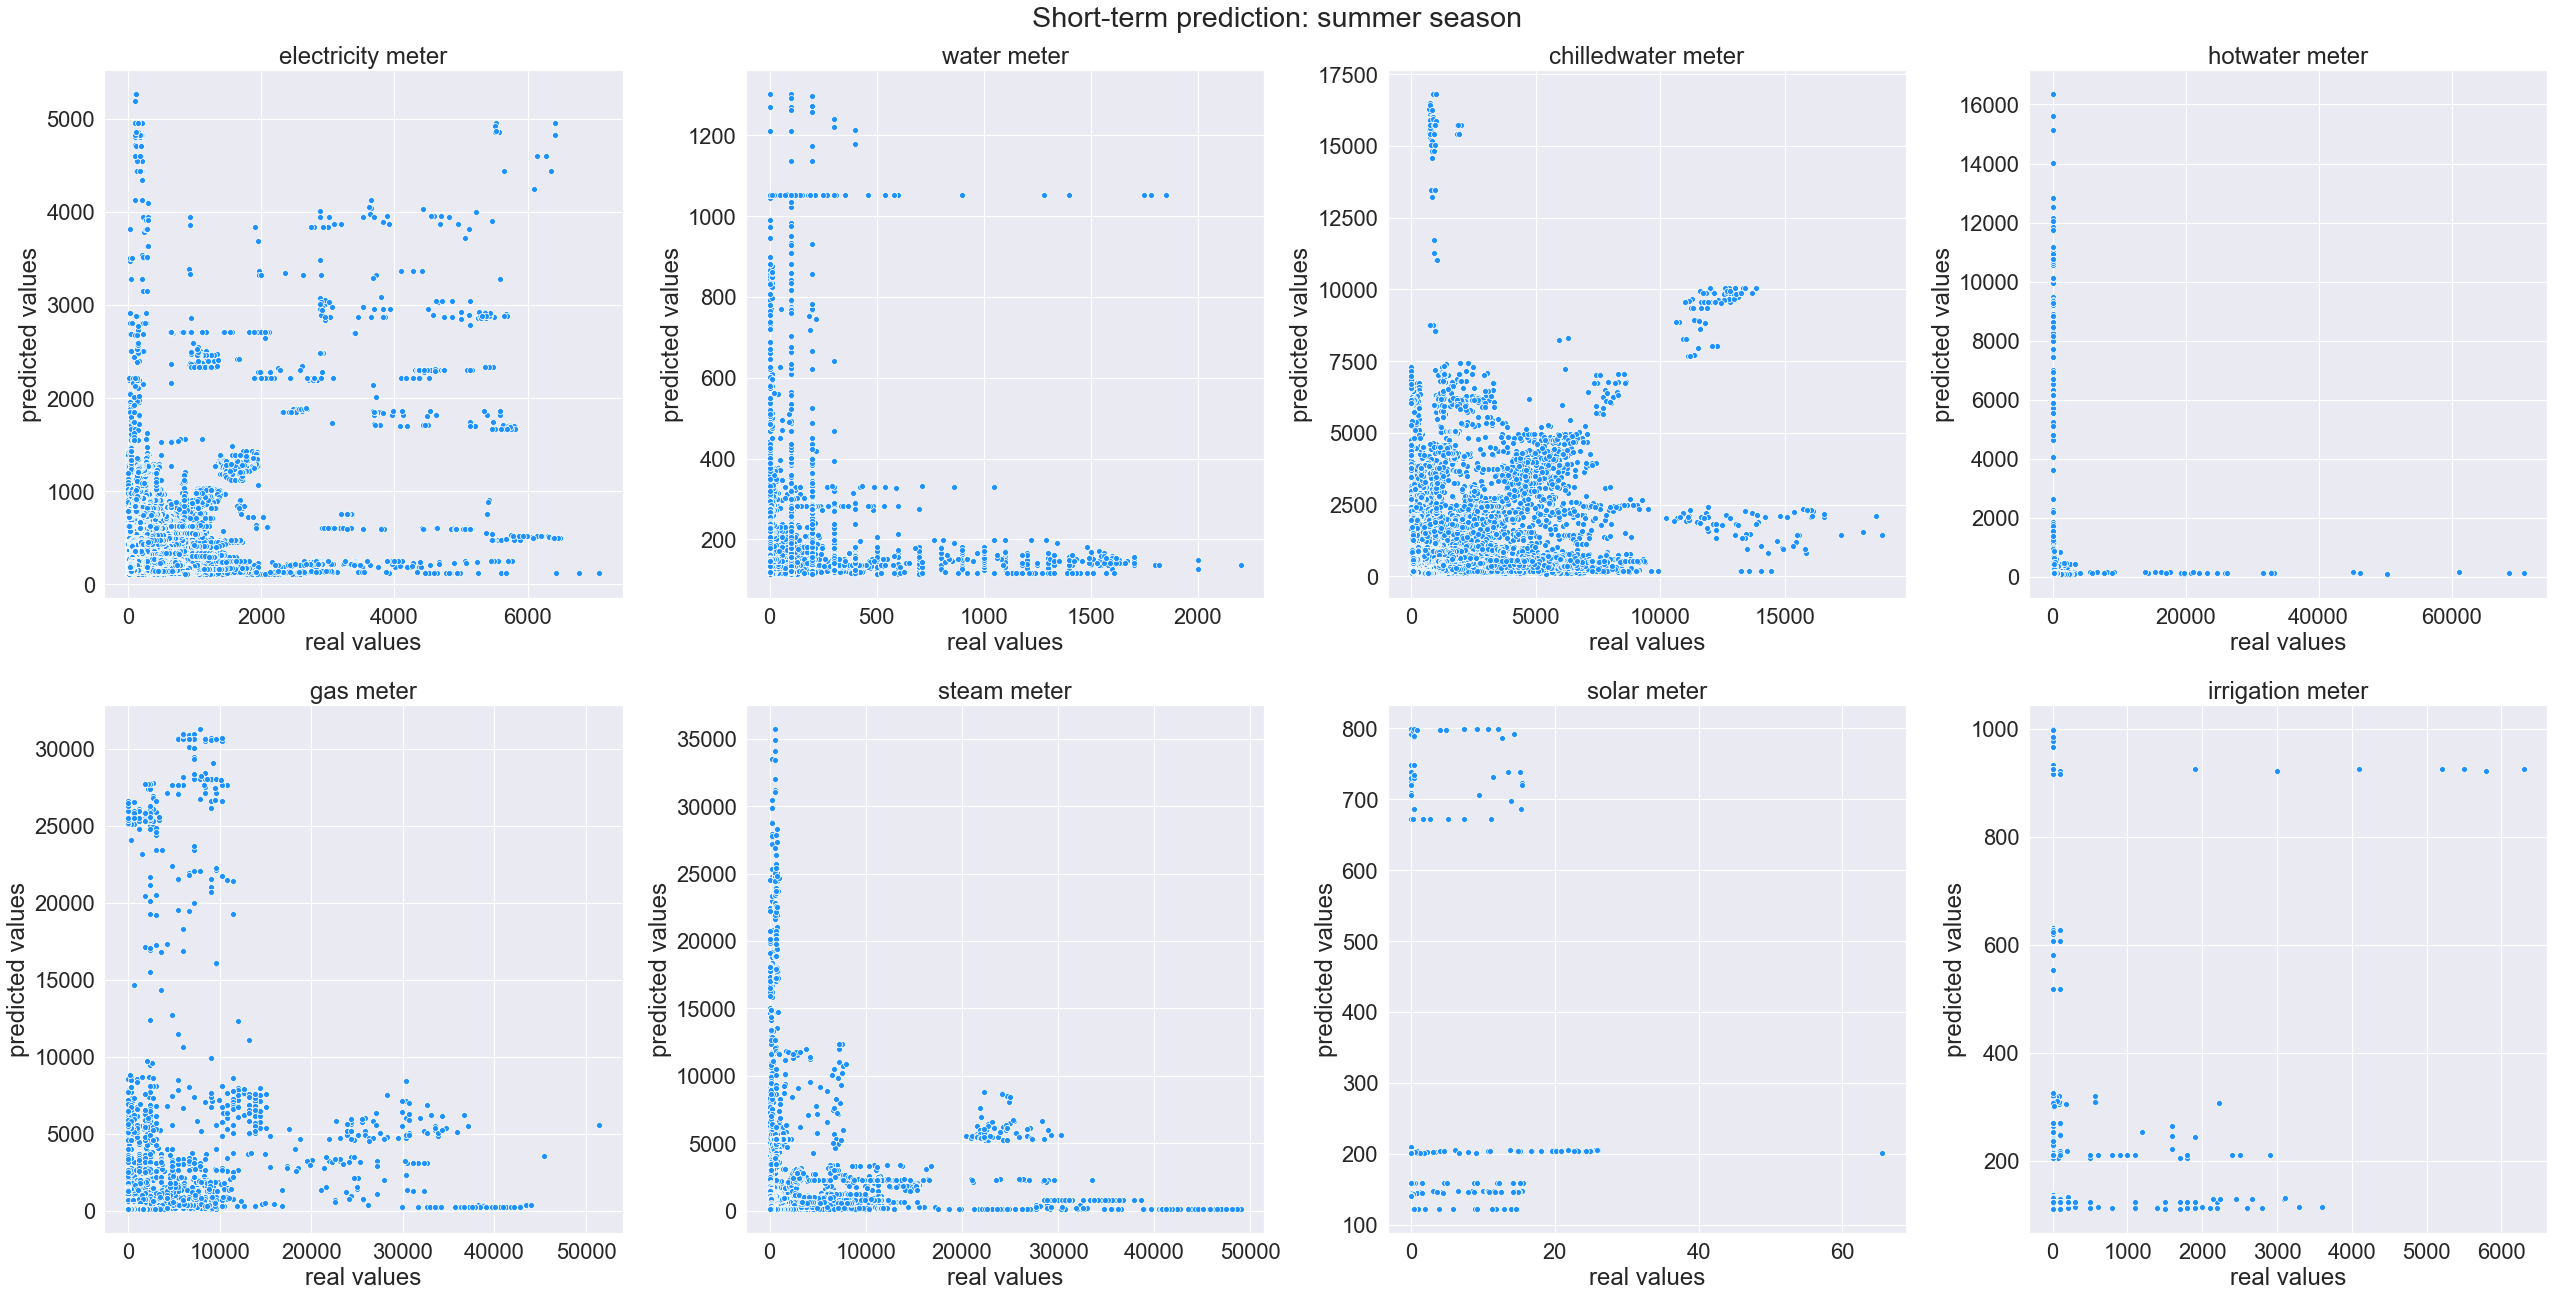

In [121]:
sns.set(rc={'figure.figsize':(36,18)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 4)
axes = axes.flatten()

color_real = "yellowgreen"
color_pred = "dodgerblue"

metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

for i,j in enumerate(metername):
    temp = st_summer[st_summer.meter==j]
    ax = axes[i]
    sns.scatterplot(data=temp, x="meter_reading", y="LGBM", ax=ax, color=color_pred)
    ax.title.set_text(j + " meter")
    ax.set(xlabel="real values", ylabel="predicted values")

f.suptitle("Short-term prediction: summer season", x = 0.5, y = 1.01)
f.tight_layout()

In [122]:
f.savefig("..\\figures\\pred_shortterm-summer2.pdf", bbox_inches='tight')
f.savefig("..\\figures\\pred_shortterm-summer2.png", dpi=72, bbox_inches='tight')

## Long-term prediction

In [123]:
lt = pd.read_csv(path_pred + "longterm_pred.csv", parse_dates=True, index_col='timestamp')
lt.dropna(inplace=True)
lt.reset_index(inplace=True)

In [124]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22433107 entries, 0 to 22433106
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   building_id    object        
 2   meter          object        
 3   meter_reading  float64       
 4   LGBM           float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 855.8+ MB


In [125]:
lt.head()

,timestamp,building_id,meter,meter_reading,LGBM
0,2017-04-17 14:00:00,Gwyneth_Panther_Office,chilledwater,0.0000,1710.470333
1,2017-04-17 15:00:00,Gwyneth_Panther_Office,chilledwater,295.4725,1710.470333
2,2017-04-17 16:00:00,Gwyneth_Panther_Office,chilledwater,1055.2589,1710.721023
3,2017-04-17 17:00:00,Gwyneth_Panther_Office,chilledwater,970.8382,1710.721023
4,2017-04-17 18:00:00,Gwyneth_Panther_Office,chilledwater,844.2072,1710.721023


#### Plots

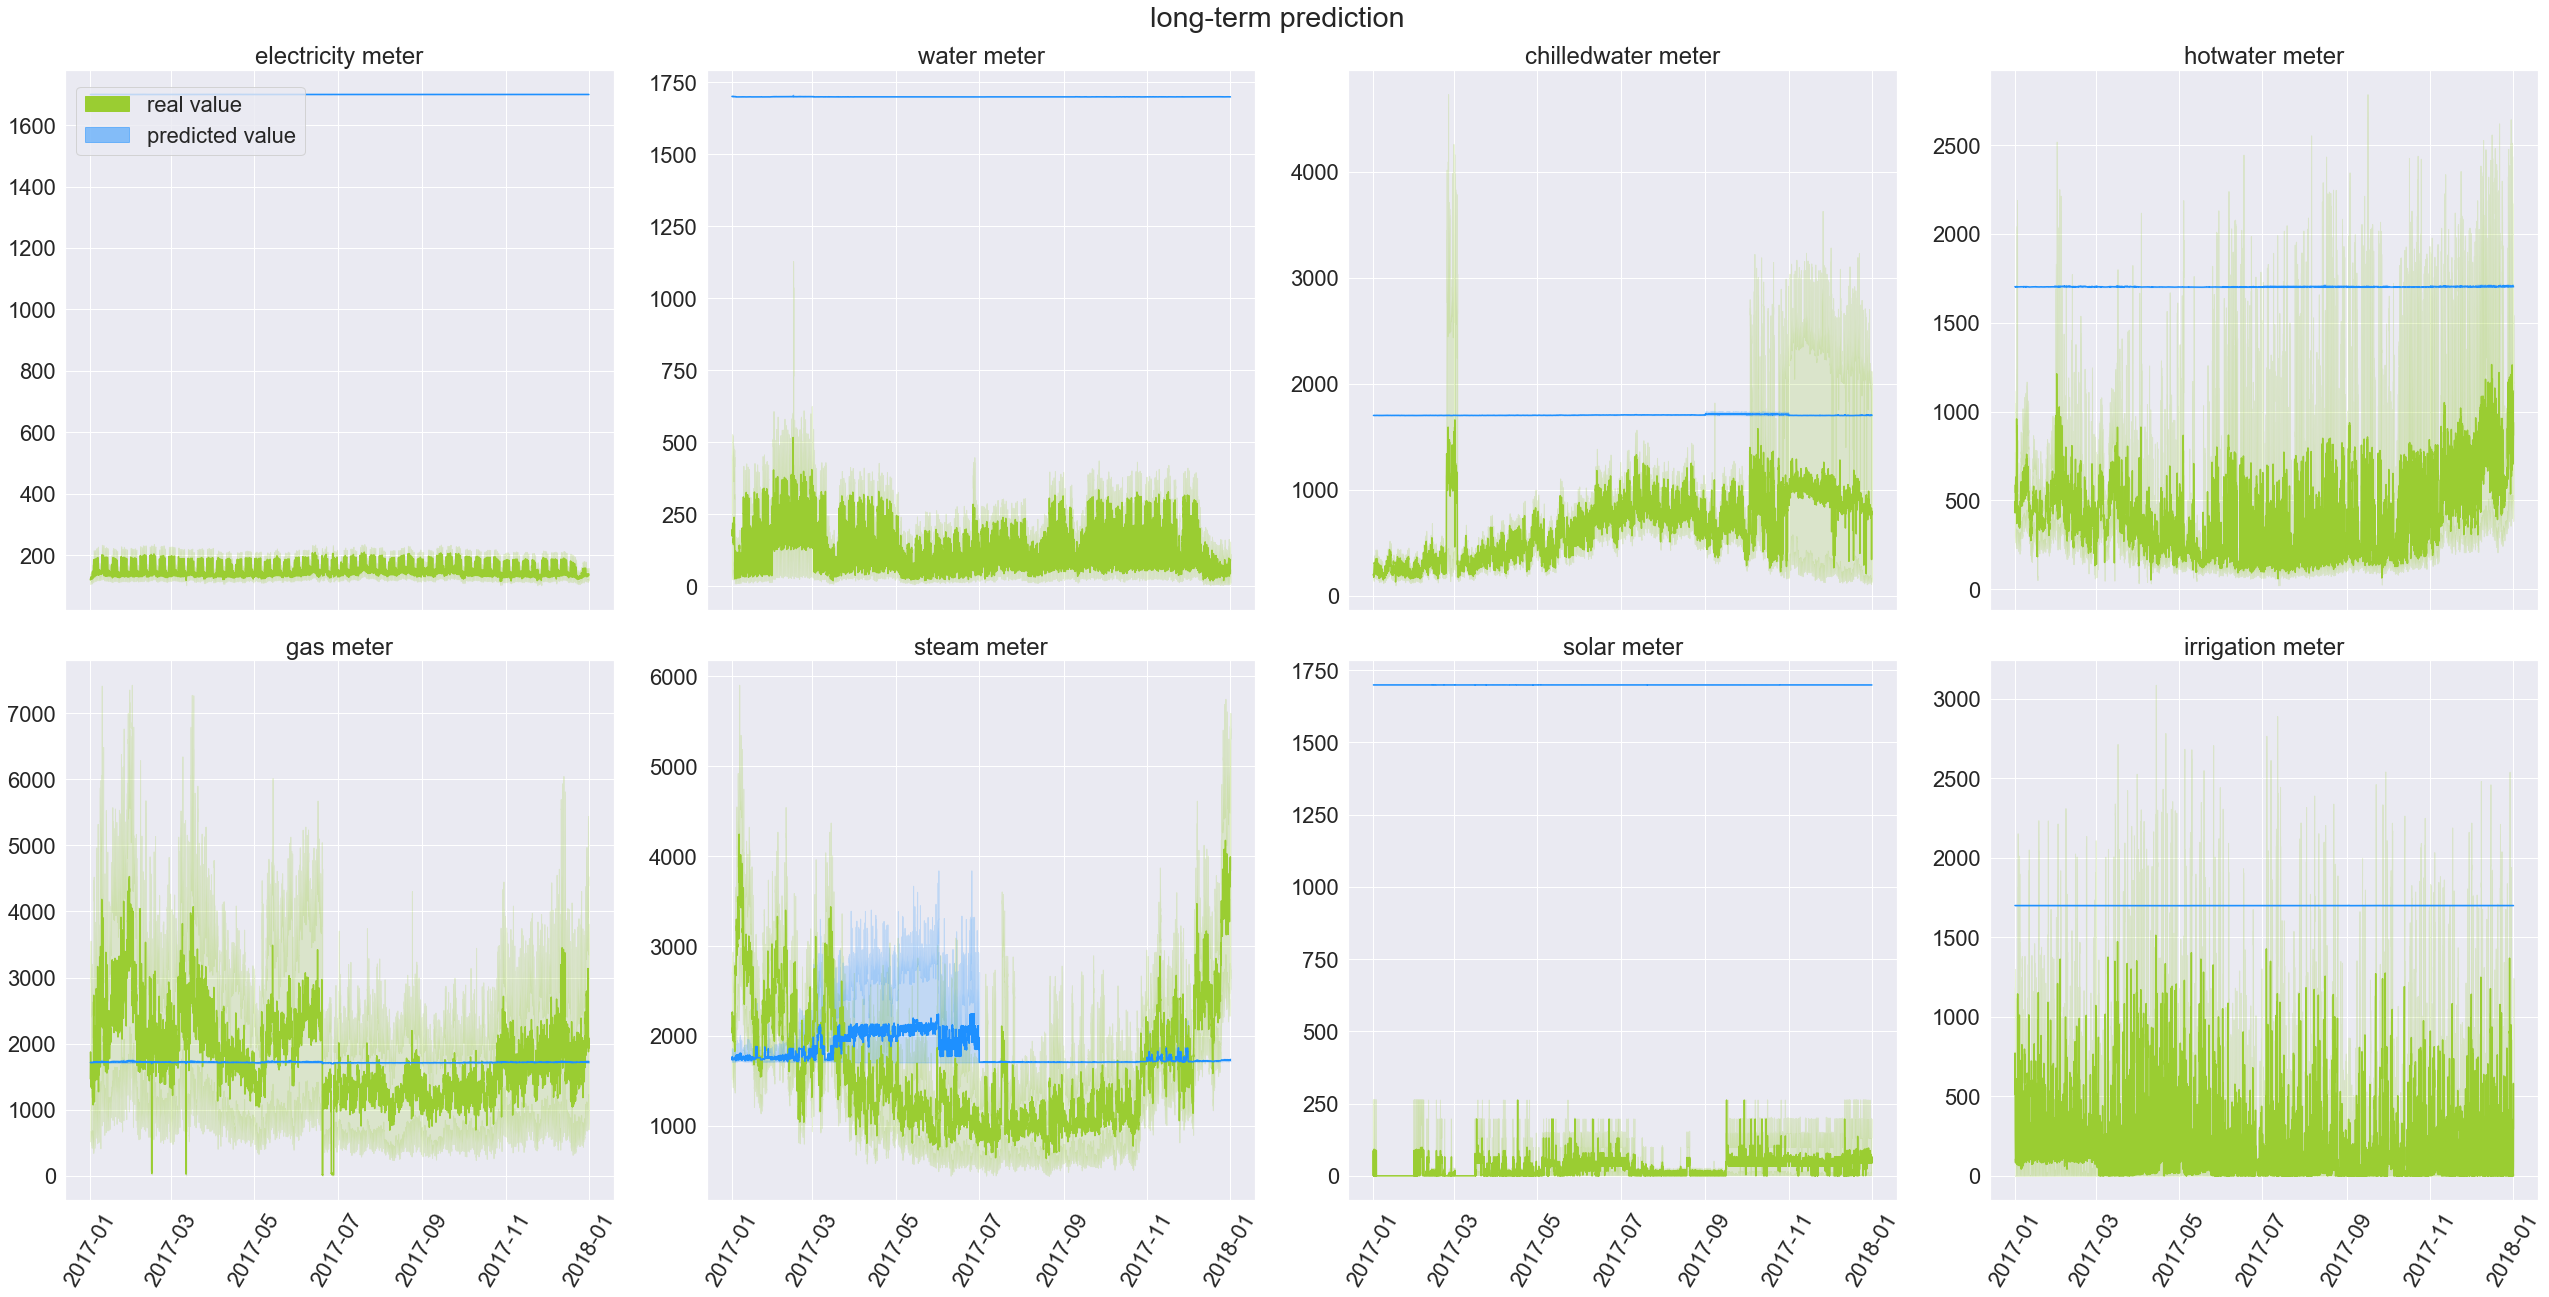

In [129]:
sns.set(rc={'figure.figsize':(36,18)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 4, sharex=True)
axes = axes.flatten()

color_real = "yellowgreen"
color_pred = "dodgerblue"

metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

for i,j in enumerate(metername):
    temp = lt[lt.meter==j]
    ax = axes[i]
    sns.lineplot(data=temp, x="timestamp", y="meter_reading", ax=ax, color=color_real)
    sns.lineplot(data=temp, x="timestamp", y="LGBM", ax=ax, color = color_pred)
    ax.title.set_text(j + " meter")
    ax.set(xlabel="", ylabel="")
    
    if i in [4,5,6,7]:        
        ax.xaxis_date()
        ax.tick_params("x", labelrotation=60)
    
    else:      
        continue
        
# Customizes legend and title
green_patch = mpatches.Patch(color=color_real, label='real value')
blue_patch = mpatches.Patch(color=color_pred, label='predicted value', alpha=0.5)
f.legend(handles=[green_patch, blue_patch], ncol=1, loc= [0.03, 0.88])
f.suptitle("long-term prediction", x = 0.5, y = 1.01)
f.tight_layout()

In [130]:
f.savefig("..\\figures\\pred_longterm1.pdf", bbox_inches='tight')
f.savefig("..\\figures\\pred_longterm1.png", dpi=72, bbox_inches='tight')

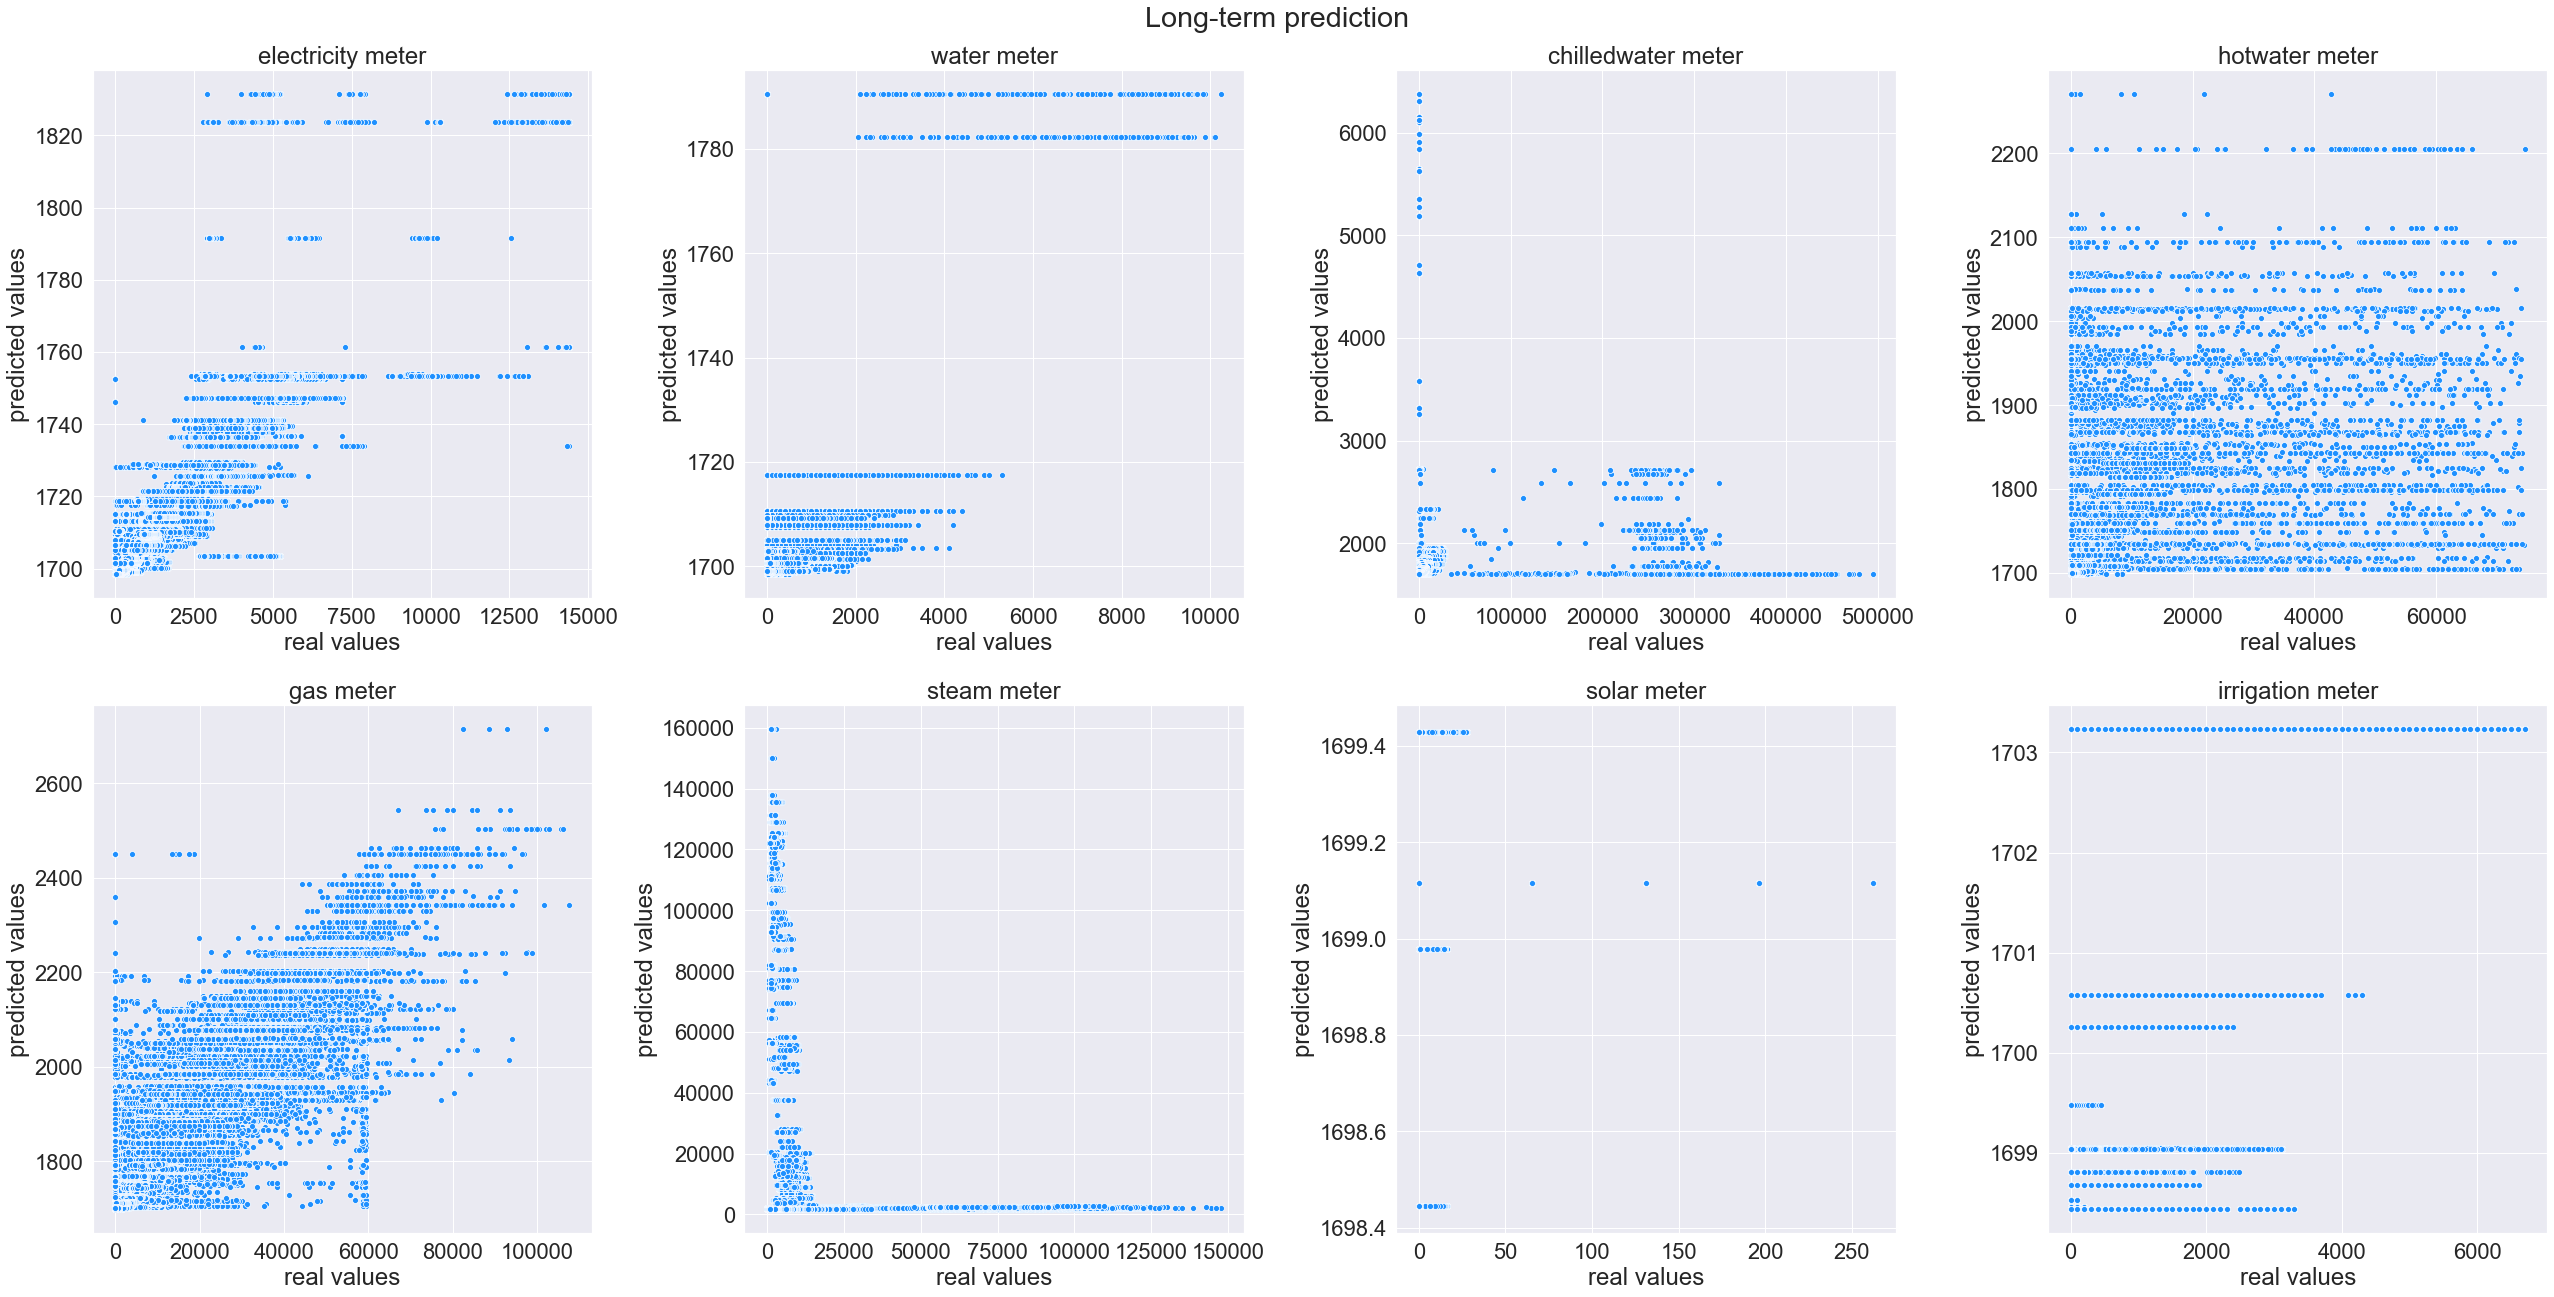

In [137]:
sns.set(rc={'figure.figsize':(36,18)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 4)
axes = axes.flatten()

color_real = "yellowgreen"
color_pred = "dodgerblue"

metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

for i,j in enumerate(metername):
    temp = lt[lt.meter==j]
    ax = axes[i]
    sns.scatterplot(data=temp, x="meter_reading", y="LGBM", ax=ax, color=color_pred)
    ax.title.set_text(j + " meter")
    ax.set(xlabel="real values", ylabel="predicted values")

f.suptitle("Long-term prediction", x = 0.5, y = 1.01)
f.tight_layout()

In [138]:
f.savefig("..\\figures\\pred_longterm2.pdf", bbox_inches='tight')
f.savefig("..\\figures\\pred_longterm2.png", dpi=72, bbox_inches='tight')

## Metrics

### Short-term: winter season

In [136]:
metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

print("Short-term prediction: winter season")
print()
# All meters
temp = st_winter[st_winter.LGBM >= 0]
rmsle = calcRMSLE(temp.meter_reading, temp.LGBM)
print("RMSLE for all meters: " + str(round(rmsle, 4)))

# each meter

for i in metername:
    temp = st_winter[(st_winter.LGBM >= 0) & (st_winter.meter == i)]
    rmsle = calcRMSLE(temp.meter_reading, temp.LGBM)
    print("RMSLE for " + i + " meter: " + str(round(rmsle, 4)))

Short-term prediction: winter season

RMSLE for all meters: 2.2959
RMSLE for electricity meter: 1.9544
RMSLE for water meter: 3.188
RMSLE for chilledwater meter: 2.3675
RMSLE for hotwater meter: 2.559
RMSLE for gas meter: 3.7372
RMSLE for steam meter: 2.2772
RMSLE for solar meter: 6.7638
RMSLE for irrigation meter: 5.0032


### Short-term: summer season

In [135]:
metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

print("Short-term prediction: winter season")
print()
# All meters
temp = st_summer[st_summer.LGBM >= 0]
rmsle = calcRMSLE(temp.meter_reading, temp.LGBM)
print("RMSLE for all meters: " + str(round(rmsle, 4)))

# each meter

for i in metername:
    temp = st_summer[(st_summer.LGBM >= 0) & (st_summer.meter == i)]
    rmsle = calcRMSLE(temp.meter_reading, temp.LGBM)
    print("RMSLE for " + i + " meter: " + str(round(rmsle, 4)))

Short-term prediction: winter season

RMSLE for all meters: 2.3567
RMSLE for electricity meter: 2.0563
RMSLE for water meter: 3.5847
RMSLE for chilledwater meter: 1.9226
RMSLE for hotwater meter: 3.1337
RMSLE for gas meter: 3.6037
RMSLE for steam meter: 2.6442
RMSLE for solar meter: 4.6649
RMSLE for irrigation meter: 4.8205


### Long-term

In [134]:
metername = ["electricity","water","chilledwater","hotwater","gas", "steam","solar","irrigation"]

print("Short-term prediction: winter season")
print()
# All meters
temp = lt[lt.LGBM >= 0]
rmsle = calcRMSLE(temp.meter_reading, temp.LGBM)
print("RMSLE for all meters: " + str(round(rmsle, 4)))

# each meter

for i in metername:
    temp = lt[(lt.LGBM >= 0) & (lt.meter == i)]
    rmsle = calcRMSLE(temp.meter_reading, temp.LGBM)
    print("RMSLE for " + i + " meter: " + str(round(rmsle, 4)))

Short-term prediction: winter season

RMSLE for all meters: 3.9732
RMSLE for electricity meter: 3.9438
RMSLE for water meter: 5.3568
RMSLE for chilledwater meter: 3.5299
RMSLE for hotwater meter: 4.332
RMSLE for gas meter: 5.3152
RMSLE for steam meter: 3.0625
RMSLE for solar meter: 6.1226
RMSLE for irrigation meter: 6.6368
